In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm 
import seaborn as sns
import datetime
import time

from importlib import reload
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import numba
from multiprocessing.pool import ThreadPool

import simulation as sim

In [3]:
reload(sim)

<module 'simulation' from 'C:\\Users\\Sharp.Ra\\PyProjects\\FinalMDS\\simulation.py'>

## Base model

In [39]:
# parameters of MM (market maker)
gamma = 0.1  # risk-aversion of MM

# parameters of market simulation
L = 210  # market orders per T (Poisson lambda)
alpha = 1.5  # power law distribution of market order volumes
k = 1.5  # coefficient k for lambda(delta) = A * exp(-k*delta), k = alpha*K => K = 1
A = L / alpha  # A = L / A = 140 => L=210

# Time parameters
T = 1  # time horizon
dt = 0.005  # time quant

# Brownian motion parameters
mu = 0.0
sigma = 2  # brownian motion

In [40]:
%%time
df_deals = sim.init_df_deals(start_price=100)
np_deals = sim.simulation_run(df_deals.to_numpy(), gamma, A, k, T, dt, mu, sigma)
df_deals = sim.add_df_deals(df_deals, np_deals)

Wall time: 19.7 ms


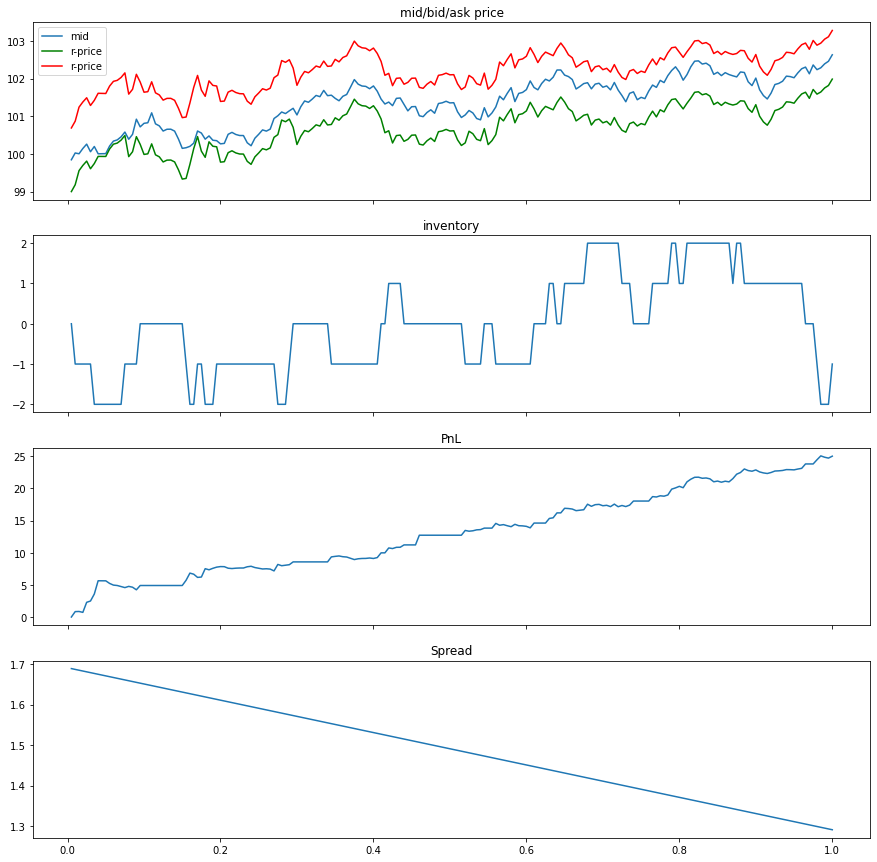

In [41]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['Bid'], 'g', label='r-price')
axes[0].plot(df_deals['Time'], df_deals['Ask'], 'r', label='r-price')
axes[0].title.set_text('mid/bid/ask price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], label='Spread')
axes[3].title.set_text('Spread')

In [7]:
avg_spread = df_deals['Spread'].mean()
print(avg_spread)

1.4897704227514235


In [8]:
df_deals = sim.init_df_deals(start_price=100)
np_deals = sim.simulation_symm_run(df_deals.to_numpy(), avg_spread, avg_spread, A, k, T, dt, mu, sigma)

df_deals = sim.add_df_deals(df_deals, np_deals)

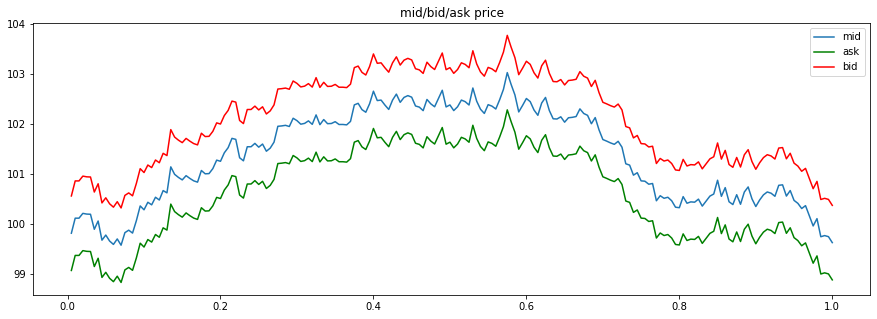

In [20]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(15, 5))

axes.plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes.plot(df_deals['Time'], df_deals['Bid'], 'g', label='ask')
axes.plot(df_deals['Time'], df_deals['Ask'], 'r', label='bid')
axes.title.set_text('mid/bid/ask price')
axes.legend()

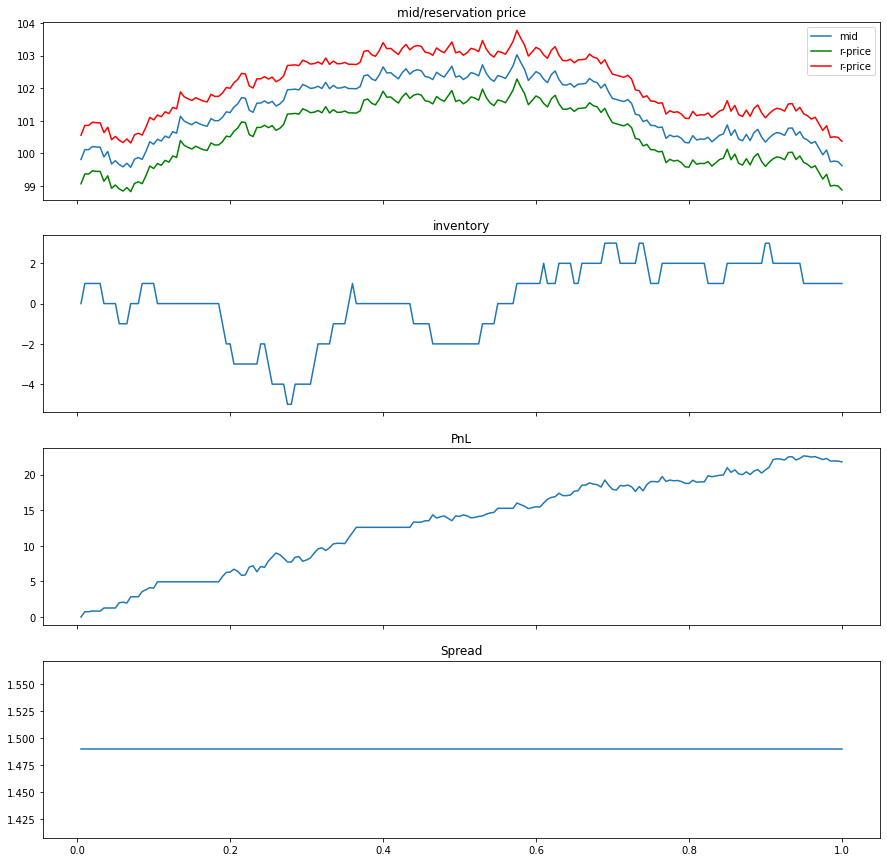

In [9]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['Bid'], 'g', label='r-price')
axes[0].plot(df_deals['Time'], df_deals['Ask'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], label='PnL')
axes[3].title.set_text('Spread')

In [10]:
gamma = 0.5

In [11]:
%%time
df_deals = sim.init_df_deals(start_price=100)
np_deals = sim.simulation_run(df_deals.to_numpy(), gamma, A, k, T, dt, mu, sigma)
df_deals = sim.add_df_deals(df_deals, np_deals)

Wall time: 7.71 ms


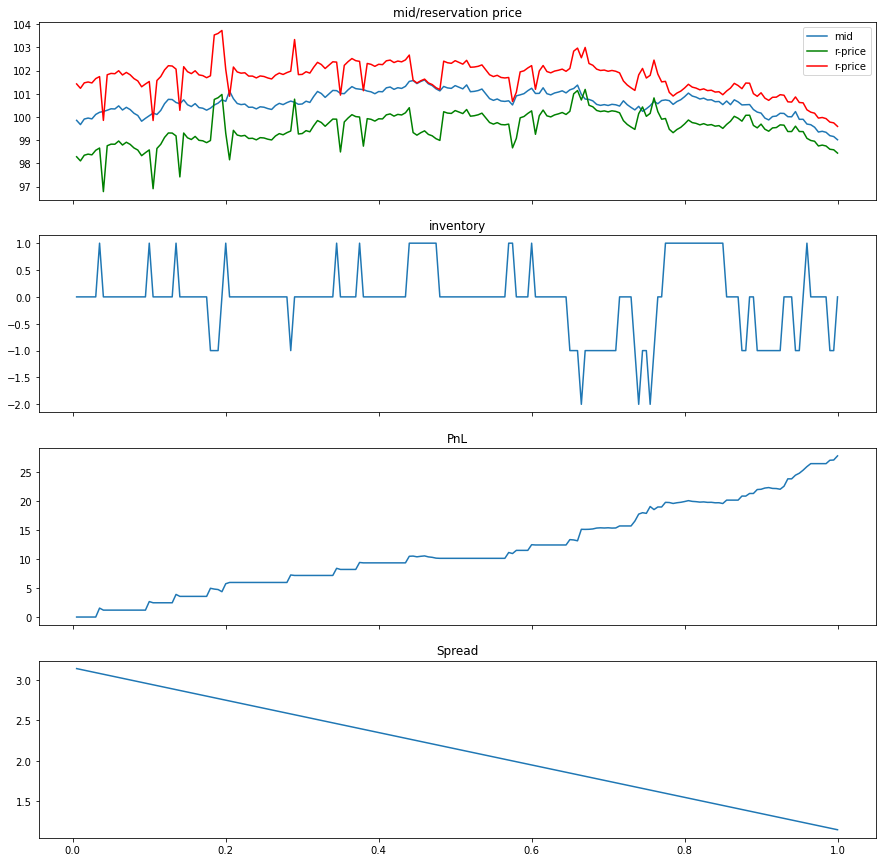

In [12]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['Bid'], 'g', label='r-price')
axes[0].plot(df_deals['Time'], df_deals['Ask'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], label='Spread')
axes[3].title.set_text('Spread')

In [13]:
avg_spread = df_deals['Spread'].mean()
print(avg_spread)

2.1457282898071237


In [14]:
df_deals = sim.init_df_deals(start_price=100)
np_deals = sim.simulation_symm_run(df_deals.to_numpy(), avg_spread, avg_spread, A, k, T, dt, mu, sigma)

df_deals = sim.add_df_deals(df_deals, np_deals)

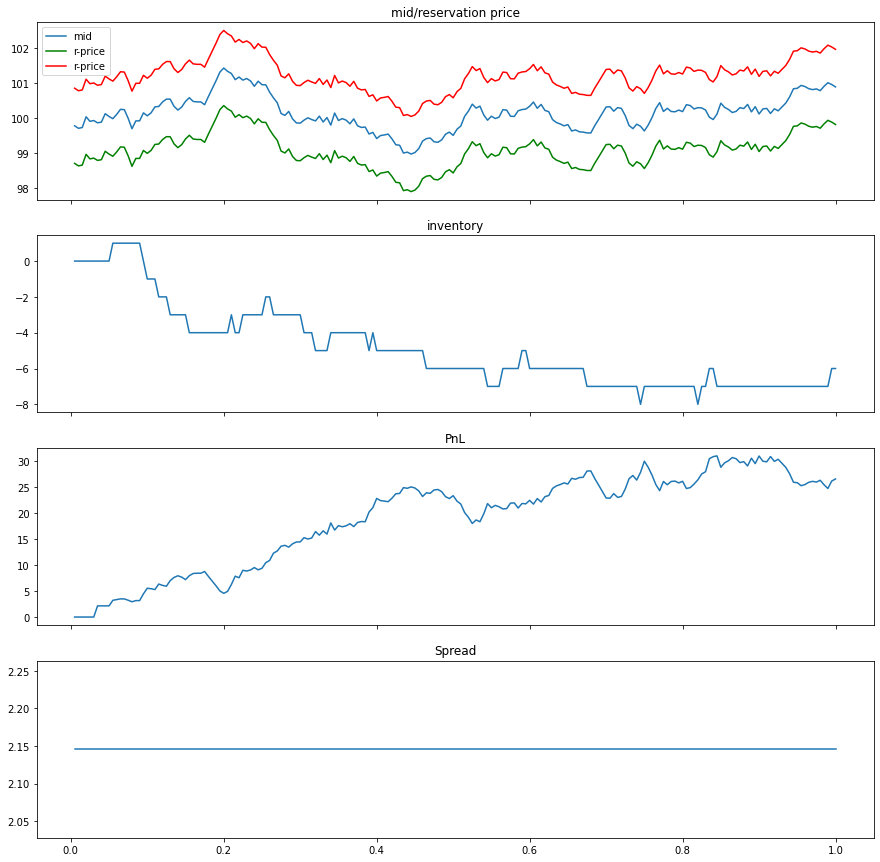

In [15]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['Bid'], 'g', label='r-price')
axes[0].plot(df_deals['Time'], df_deals['Ask'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], label='PnL')
axes[3].title.set_text('Spread')

In [16]:
df_deals[:5]

,Time,Wealth,Inventory,Deal side,Mid,Bid,Ask,R-price,Spread,PnL
1,0.005,0.0,0,0,99.773644,98.700780,100.846508,99.773644,2.145728,0.0
2,0.010,0.0,0,0,99.702114,98.629250,100.774978,99.702114,2.145728,0.0
3,0.015,0.0,0,0,99.724111,98.651247,100.796975,99.724111,2.145728,0.0
4,0.020,0.0,0,0,100.031438,98.958574,101.104302,100.031438,2.145728,0.0
5,0.025,0.0,0,0,99.901674,98.828810,100.974538,99.901674,2.145728,0.0


In [20]:
%%time
df_simres = sim.run_sims(1000, start_price=100, gamma=0.1, A=A, k=k, T=T, dt=dt, mu=mu, sigma=sigma)

Wall time: 658 ms


In [21]:
df_simres_01 = df_simres.copy()

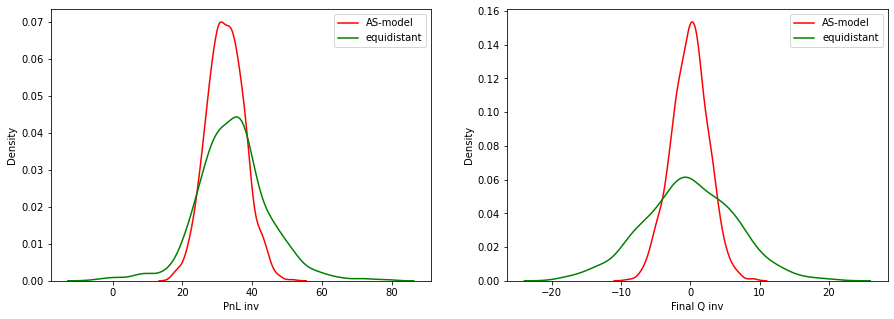

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(data=df_simres_01, x='PnL inv', color='r', ax=axes[0], label='AS-model')
sns.kdeplot(data=df_simres_01, x='PnL const', color='g', ax=axes[0], label='equidistant')
axes[0].legend()

sns.kdeplot(data=df_simres_01, x='Final Q inv', color='r', ax=axes[1], label='AS-model')
sns.kdeplot(data=df_simres_01, x='Final Q const', color='g', ax=axes[1], label='equidistant')
axes[1].legend()

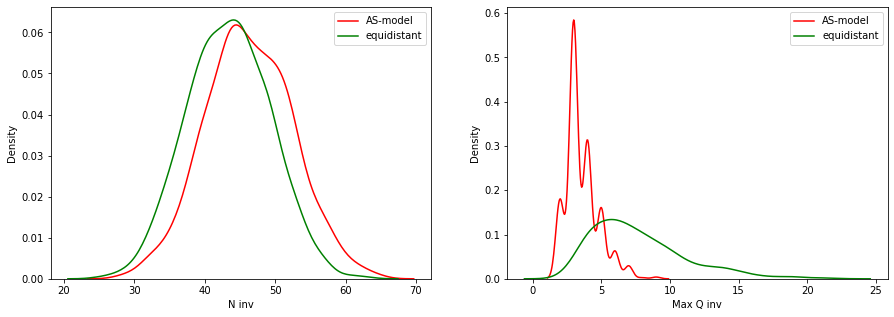

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(data=df_simres_01, x='N inv', color='r', ax=axes[0], label='AS-model')
sns.kdeplot(data=df_simres_01, x='N const', color='g', ax=axes[0], label='equidistant')
axes[0].legend()

sns.kdeplot(data=df_simres_01, x='Max Q inv', color='r', ax=axes[1], label='AS-model')
sns.kdeplot(data=df_simres_01, x='Max Q const', color='g', ax=axes[1], label='equidistant')
axes[1].legend()

In [24]:
df_simres_01[:5]

,PnL inv,Final Q inv,PnL const,Final Q const,Spread inv,Spread const,Max Q inv,Max Q const,N inv,N const
0,21.821633,1.0,33.282390,-15.0,1.482359,1.474984,3.0,15.0,34,45
1,31.681768,1.0,36.494028,-4.0,1.482359,1.474984,2.0,9.0,44,45
2,41.527621,3.0,38.852255,6.0,1.482359,1.474984,3.0,12.0,59,43
3,35.100059,2.0,28.711577,4.0,1.482359,1.474984,2.0,4.0,50,37
4,34.580187,0.0,44.942240,4.0,1.482359,1.474984,2.0,6.0,45,45


In [25]:
def stat_df(df_simres):
    df_res = pd.DataFrame(index=['AS-model strategy', 'Benchmark strategy'])
    
    for model in ["AS-model strategy", "Benchmark strategy"]:
        postfix = " inv" if model=="AS-model strategy" else " const"
        
        df_res.loc[model, 'Average spread'] = df_simres['Spread'+postfix].mean()
        df_res.loc[model, 'Mean PL'] = df_simres['PnL'+postfix].mean()
        df_res.loc[model, 'Std PL'] = df_simres['PnL'+postfix].std()

        df_res.loc[model, 'Mean final Q'] = df_simres['Final Q'+postfix].mean()
        df_res.loc[model, 'Std final Q'] = df_simres['Final Q'+postfix].std()

        df_res.loc[model, 'Mean N'] = df_simres['N'+postfix].mean()
        df_res.loc[model, 'Std N'] = df_simres['N'+postfix].std()

        df_res.loc[model, 'Mean max Q'] = df_simres['Max Q'+postfix].mean()
        df_res.loc[model, 'Std max Q'] = df_simres['Max Q'+postfix].std()

        df_res.loc[model, 'Mean PL a deal'] = (df_simres['PnL'+postfix] / df_simres['N'+postfix]).mean()
        df_res.loc[model, 'Std PL a deal'] = (df_simres['PnL'+postfix] / df_simres['N'+postfix]).std()
    
    return df_res

In [26]:
stat_df(df_simres_01)

,Average spread,Mean PL,Std PL,Mean final Q,Std final Q,Mean N,Std N,Mean max Q,Std max Q,Mean PL a deal,Std PL a deal
AS-model strategy,1.482359,32.383624,5.304004,-0.117,2.656382,46.256,6.200557,3.597,1.194160,0.700140,0.067790
Benchmark strategy,1.474984,34.531163,10.241582,-0.144,6.587006,43.400,5.881547,7.674,3.435335,0.797154,0.217661


In [27]:
df_simres = sim.run_sims(1000, start_price=100, gamma=0.5, A=A, k=k, T=T, dt=dt, mu=mu, sigma=sigma)

In [28]:
df_simres_1 = df_simres.copy()

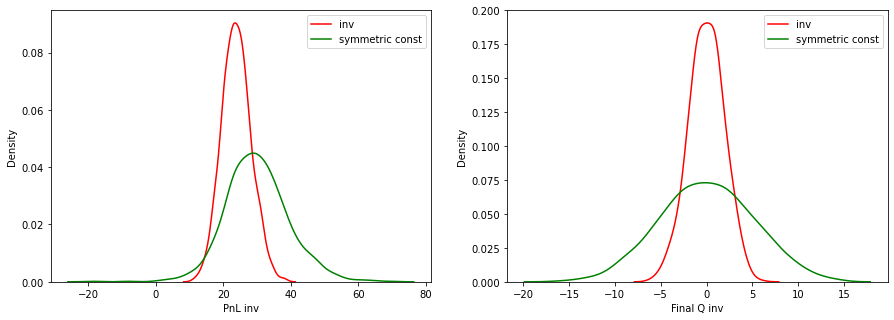

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(data=df_simres_1, x='PnL inv', color='r', ax=axes[0], label='inv')
sns.kdeplot(data=df_simres_1, x='PnL const', color='g', ax=axes[0], label='symmetric const')
axes[0].legend()

sns.kdeplot(data=df_simres_1, x='Final Q inv', color='r', ax=axes[1], label='inv', bw_adjust=1.3)
sns.kdeplot(data=df_simres_1, x='Final Q const', color='g', ax=axes[1], label='symmetric const')
axes[1].legend()

In [30]:
stat_df(df_simres_1)

,Average spread,Mean PL,Std PL,Mean final Q,Std final Q,Mean N,Std N,Mean max Q,Std max Q,Mean PL a deal,Std PL a deal
AS-model strategy,2.135053,23.905975,4.308001,-0.009,1.913264,38.040,6.102593,2.405,0.875066,0.628833,0.056616
Benchmark strategy,2.124431,30.044218,9.344243,0.057,5.124257,27.247,4.944334,5.941,2.625340,1.100624,0.272721


## USD/RUB

### Base model for 1 hour horizon

In [36]:
# parameters of MM (market maker)
gamma = 0.1  # risk-aversion of MM

# parameters of market structure
alpha = 2.0  # tail exponent

K = 0.0067  # avg impact = K * log(V)
ticksize = 0.0025

# parameters of market simulation
T = 1  # one hour
dt = 0.5 / 3600  # x seconds (x / 3600)
L = 2300 # number of market orders per T (Poisson lambda)

# coefficient lambda(delta) = A * exp(-k*delta)
k = alpha / K 
A = L / alpha

# Brownian motion parameters (rough estimation)
mu = 0.  # zero drift
sigma = 0.4 * (1/8)**0.5  # brownian motion, daily historical std dev of USD/RUB, convert to hour basis

In [39]:
%%time
# Example run
df_deals = sim.init_df_deals(start_price)
np_deals = sim.simulation_run(df_deals.to_numpy(), gamma, A, k, T, dt, mu, sigma, ticksize)
df_deals = sim.add_df_deals(df_deals, np_deals)

Wall time: 160 ms


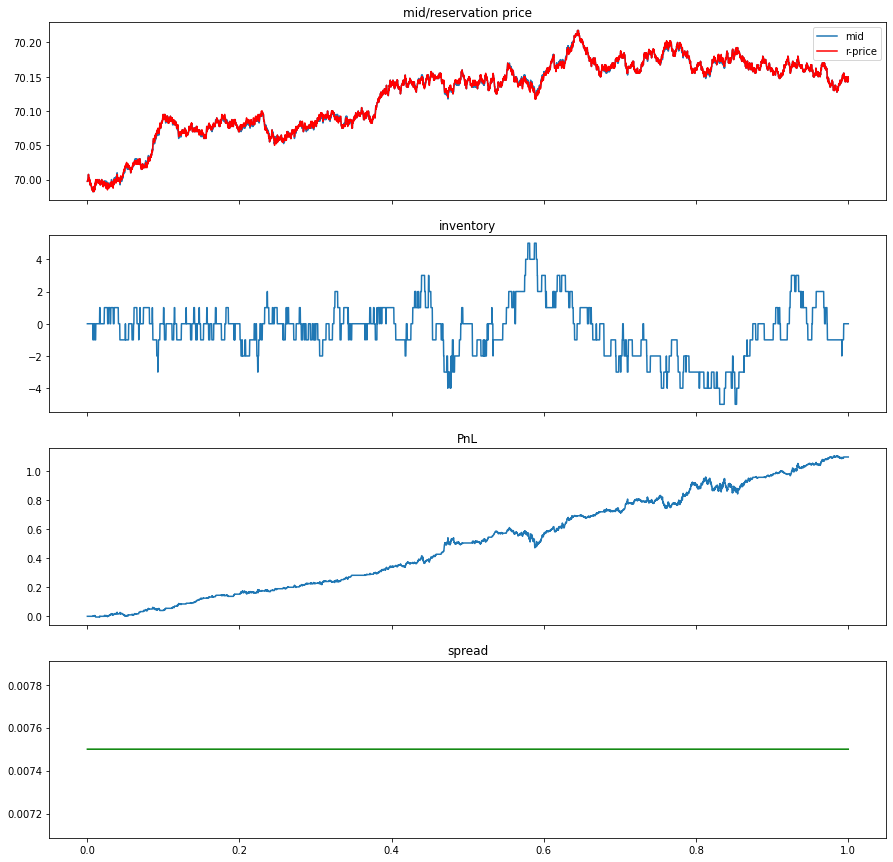

In [40]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='spread')
axes[3].title.set_text('spread')

In [48]:
avs = df_deals['Spread'].mean()
avs

0.007500000000000257

In [49]:
%%time
# Example run
df_deals = sim.init_df_deals(start_price)
np_deals = sim.simulation_symm_run(df_deals.to_numpy(), avs, avs, A, k, T, dt, mu, sigma, ticksize)
df_deals = sim.add_df_deals(df_deals, np_deals)

Wall time: 163 ms


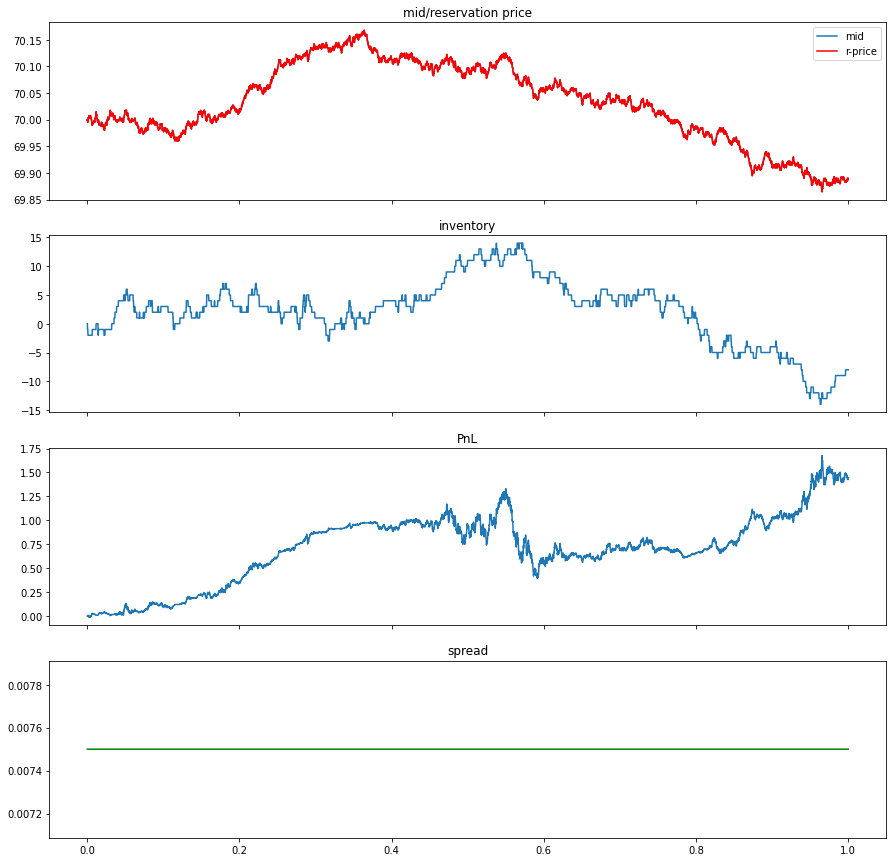

In [50]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='spread')
axes[3].title.set_text('spread')

In [53]:
df_deals

,Time,Wealth,Inventory,Deal side,Mid,Bid,Ask,R-price,Spread,PnL
1,0.000139,0.00000,0,0,70.0000,69.99625,70.00375,70.0000,0.0075,0.000000
2,0.000278,70.00125,-1,2,69.9975,69.99375,70.00125,69.9975,0.0075,0.003113
3,0.000417,70.00125,-1,0,70.0000,69.99625,70.00375,70.0000,0.0075,0.002105
4,0.000556,70.00125,-1,0,69.9975,69.99375,70.00125,69.9975,0.0075,0.004900
5,0.000694,70.00125,-1,0,69.9950,69.99125,69.99875,69.9950,0.0075,0.005406
...,...,...,...,...,...,...,...,...,...,...
7196,0.999444,560.55000,-8,0,69.8875,69.88375,69.89125,69.8875,0.0075,1.442505
7197,0.999583,560.55000,-8,0,69.8900,69.88625,69.89375,69.8900,0.0075,1.432431
7198,0.999722,560.55000,-8,0,69.8900,69.88625,69.89375,69.8900,0.0075,1.431611
7199,0.999861,560.55000,-8,0,69.8900,69.88625,69.89375,69.8900,0.0075,1.426287


In [41]:
df_simres = sim.run_sims(1000, start_price=start_price, 
                        gamma=gamma, A=A, k=k, T=T, dt=dt, mu=mu, sigma=sigma, ticksize=0.0025)

In [44]:
df_simres[:5]

,PnL inv,Final Q inv,PnL const,Final Q const,Spread inv,Spread const,Max Q inv,Max Q const,N inv,N const
0,1.685738,-4.0,-0.260546,22.0,0.007499,0.007499,8.0,25.0,397,393
1,1.288767,-7.0,-0.791020,41.0,0.007499,0.007499,7.0,47.0,419,371
2,1.235287,-5.0,0.437384,21.0,0.007499,0.007499,7.0,21.0,437,366
3,1.119589,-9.0,1.772462,32.0,0.007499,0.007499,9.0,38.0,407,352
4,1.296622,15.0,2.506373,-14.0,0.007499,0.007499,17.0,19.0,385,381


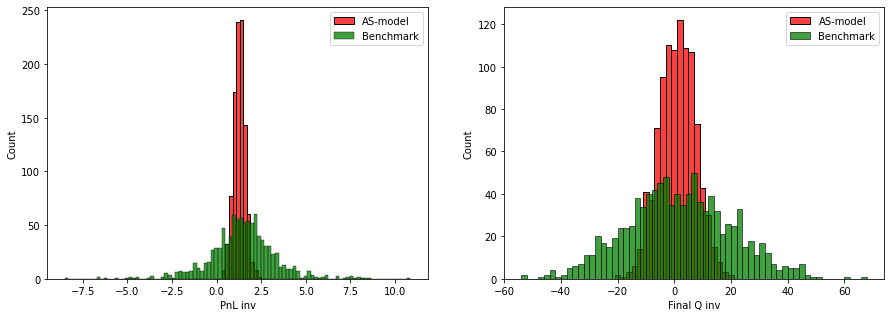

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='PnL inv', color='r', ax=axes[0], label='AS-model', binwidth=0.2)
sns.histplot(data=df_simres, x='PnL const', color='g', ax=axes[0], label='Benchmark', binwidth=0.2)
axes[0].legend()

sns.histplot(data=df_simres, x='Final Q inv', color='r', ax=axes[1], label='AS-model', binwidth=2)
sns.histplot(data=df_simres, x='Final Q const', color='g', ax=axes[1], label='Benchmark', binwidth=2)
axes[1].legend()

In [43]:
stat_df(df_simres)

,Average spread,Mean PL,Std PL,Mean final Q,Std final Q,Mean N,Std N,Mean max Q,Std max Q,Mean PL a deal,Std PL a deal
AS-model strategy,0.007499,1.273901,0.318783,0.527,6.407052,407.345,20.182550,8.228,2.893508,0.003129,0.000774
Benchmark strategy,0.007499,1.482055,1.933373,1.110,18.596336,370.040,19.270333,23.614,9.729423,0.004014,0.005249


In [54]:
gamma = 0.5
df_simres = sim.run_sims(1000, start_price=start_price, 
                         gamma=gamma, A=A, k=k, T=T, dt=dt, mu=mu, sigma=sigma, ticksize=0.0025)

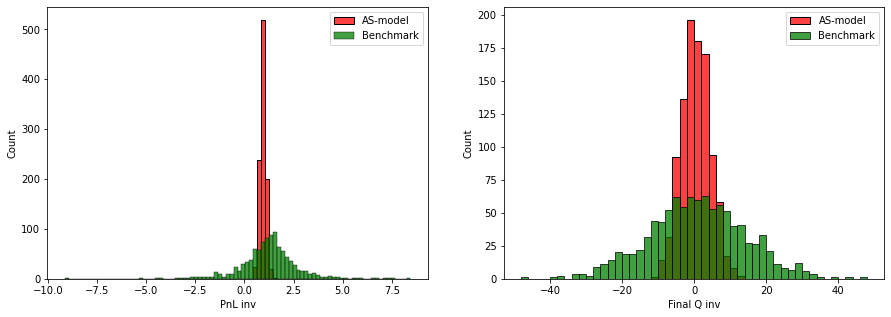

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='PnL inv', color='r', ax=axes[0], label='AS-model', binwidth=0.2)
sns.histplot(data=df_simres, x='PnL const', color='g', ax=axes[0], label='Benchmark', binwidth=0.2)
axes[0].legend()

sns.histplot(data=df_simres, x='Final Q inv', color='r', ax=axes[1], label='AS-model', binwidth=2)
sns.histplot(data=df_simres, x='Final Q const', color='g', ax=axes[1], label='Benchmark', binwidth=2)
axes[1].legend()

In [58]:
stat_df(df_simres)

,Average spread,Mean PL,Std PL,Mean final Q,Std final Q,Mean N,Std N,Mean max Q,Std max Q,Mean PL a deal,Std PL a deal
AS-model strategy,0.011691,0.953369,0.146188,-0.080,3.959960,291.494,17.989541,4.882,1.761016,0.003270,0.000454
Benchmark strategy,0.012498,1.236474,1.430737,0.312,13.423071,199.532,13.509459,16.703,7.024111,0.006205,0.007161


### Base model for 1 day horizon

In [25]:
# parameters of MM (market maker)
gamma = 0.1  # risk-aversion of MM

# parameters of market structure
alpha = 2  # tail exponent

K = 0.006  # avg impact = K * log(V)
ticksize = 0.0025

# parameters of market simulation
T = 9  # one day
dt = 0.5 / 3600  # x seconds (x / 3600)
L = 2200 # number of market orders per T (Poisson lambda)

# coefficient lambda(delta) = A * exp(-k*delta)
k = alpha / K 
A = L / alpha

# Brownian motion parameters (rough estimation)
mu = 0.  # zero drift
sigma = 0.4 * (1/8)**0.5  # brownian motion, daily historical std dev of USD/RUB, convert to hour basis

In [26]:
start_price = 70.

In [27]:
%%time
# Example run
df_deals = sim.init_df_deals(start_price)
np_deals = sim.simulation_run(df_deals.to_numpy(), gamma, A, k, T, dt, mu, sigma, ticksize)
df_deals = sim.add_df_deals(df_deals, np_deals)

Wall time: 55.1 s


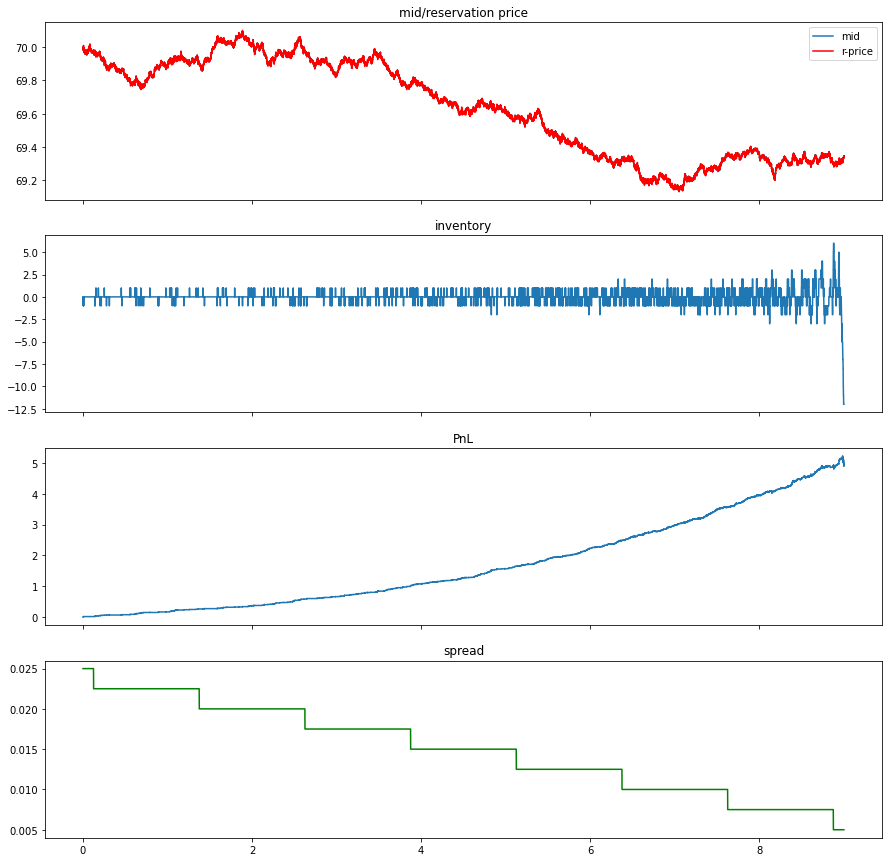

In [28]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='spread')
axes[3].title.set_text('spread')

### 1 day with spread limit

In [29]:
# parameters of MM (market maker)
gamma = 0.1  # risk-aversion of MM

# parameters of market structure
alpha = 2  # tail exponent

K = 0.006  # avg impact = K * log(V)
ticksize = 0.0025
max_spread = 4  # 2x

# parameters of market simulation
T = 9  # one day
dt = 0.5 / 3600  # x seconds (x / 3600)
L = 2000 # number of market orders per T (Poisson lambda)

# coefficient lambda(delta) = A * exp(-k*delta)
k = alpha / K 
A = L / alpha

# Brownian motion parameters (rough estimation)
mu = 0.  # zero drift
sigma = 0.4 * (1/8)**0.5  # brownian motion, daily historical std dev of USD/RUB, convert to hour basis

In [30]:
start_price = 70.

In [31]:
%%time
# Example run
df_deals = sim.init_df_deals(start_price)
np_deals = sim.simulation_run(df_deals.to_numpy(), gamma, A, k, T, dt, mu, sigma, ticksize, max_spread)
df_deals = sim.add_df_deals(df_deals, np_deals)

Wall time: 58.1 s


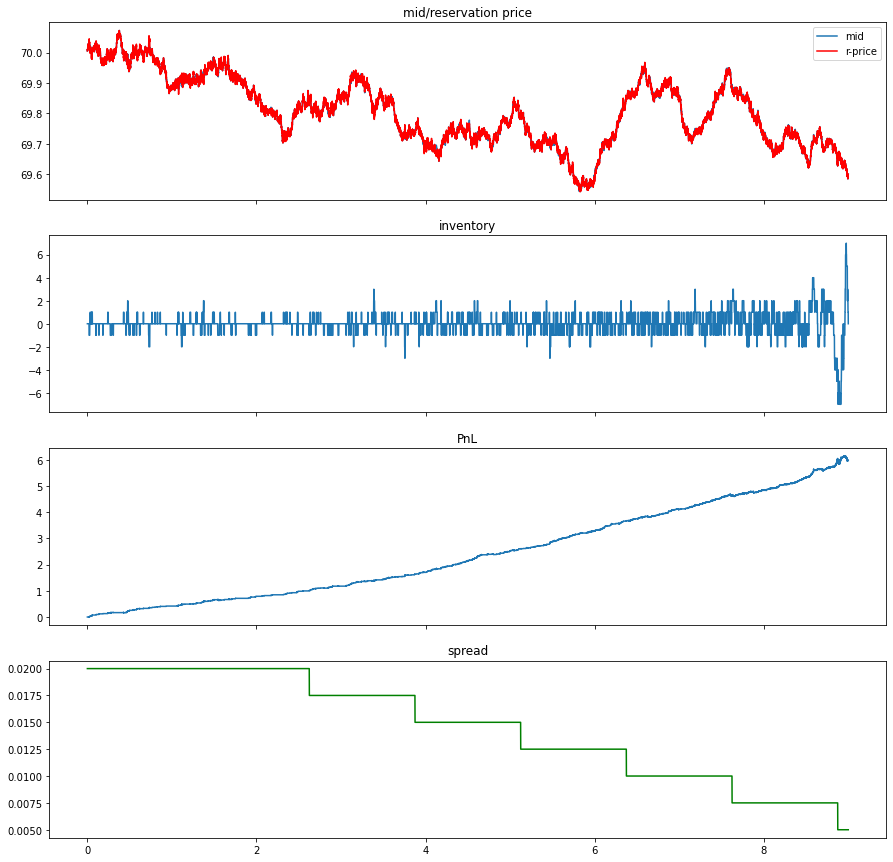

In [32]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='spread')
axes[3].title.set_text('spread')

### Multiperiod 2H model

In [44]:
# parameters of MM (market maker)
gamma = 0.1  # risk-aversion of MM

# parameters of market structure
alpha = 2  # tail exponent
K = 0.0065  # avg impact = K * log(V)
ticksize = 0.0025

# parameters of market simulation
T = 2  # hours
periods = 4  # each period is T
dt = 0.5 / 3600  # x seconds (x / 3600)
L = 2200 # number of market orders per T (Poisson lambda)

# coefficient lambda(delta) = A * exp(-k*delta)
k = alpha / K 
A = L / alpha

# Brownian motion parameters (rough estimation)
mu = 0.  # zero drift
sigma = 0.4 * (1/8)**0.5  # brownian motion, daily historical std dev of USD/RUB, convert to hour basis

In [49]:
start_price = 70.

In [50]:
%%time
# Example run
df_deals = sim.init_df_deals(start_price)
np_deals = sim.sim_multiperiod_run(periods, df_deals.to_numpy(), gamma, A, k, T, dt, mu, sigma, ticksize)
df_deals = sim.add_df_deals(df_deals, np_deals)

Wall time: 4.29 s


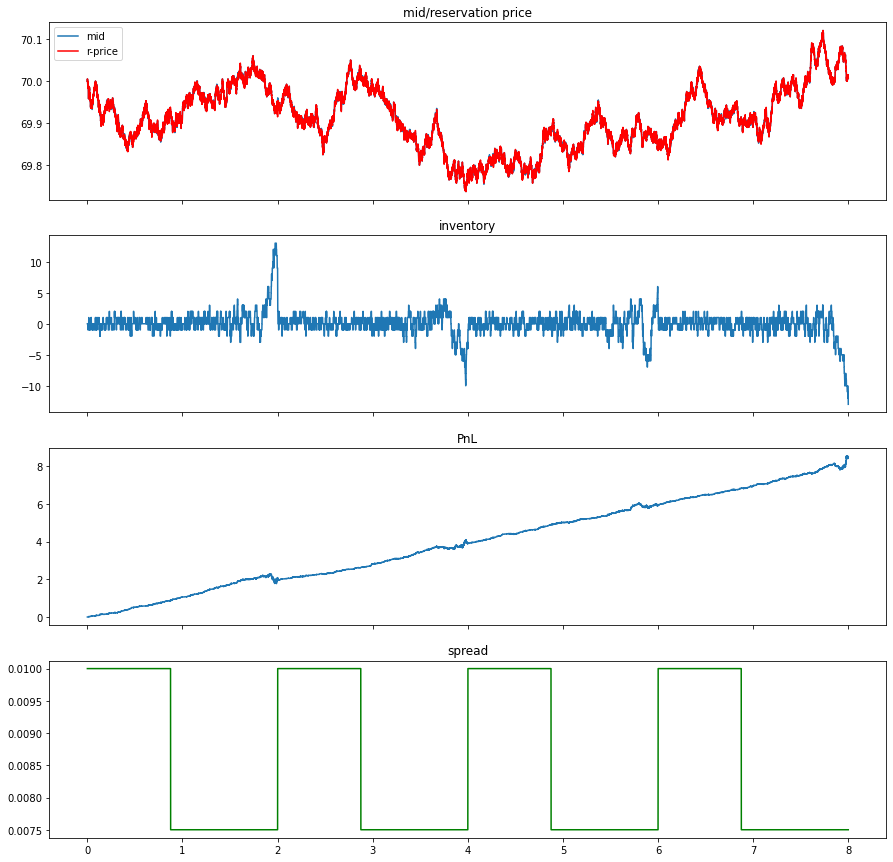

In [51]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='spread')
axes[3].title.set_text('spread')

In [56]:
df_simres = sim.run_multiperiod_sims(500, multiperiod=periods,
                                     start_price=start_price, 
                                     gamma=gamma, A=A, k=k, T=T, dt=dt, mu=mu, sigma=sigma, ticksize=ticksize)

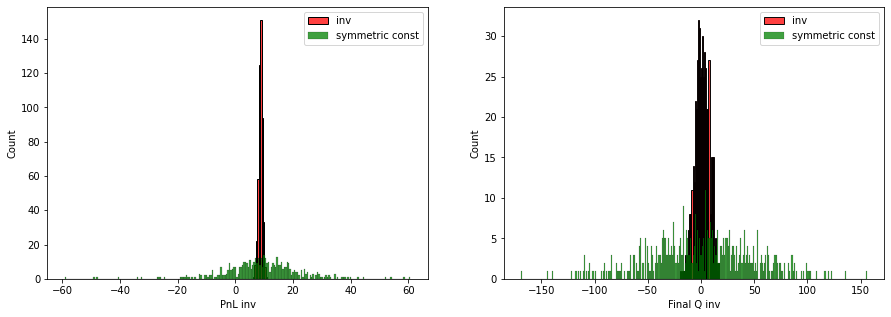

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='PnL inv', color='r', ax=axes[0], label='inv', binwidth=0.5)
sns.histplot(data=df_simres, x='PnL const', color='g', ax=axes[0], label='symmetric const', binwidth=0.5)
axes[0].legend()

sns.histplot(data=df_simres, x='Final Q inv', color='r', ax=axes[1], label='inv', binwidth=1)
sns.histplot(data=df_simres, x='Final Q const', color='g', ax=axes[1], label='symmetric const', binwidth=1)
axes[1].legend()

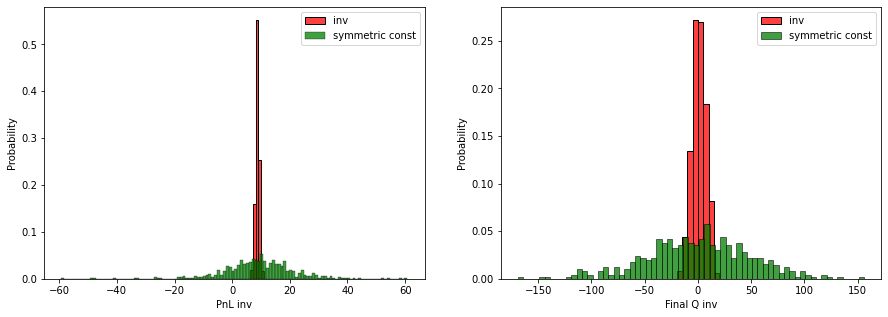

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='PnL inv', color='r', ax=axes[0], label='inv', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='PnL const', color='g', ax=axes[0], label='symmetric const', binwidth=1, stat='probability')
axes[0].legend()

sns.histplot(data=df_simres, x='Final Q inv', color='r', ax=axes[1], label='inv', binwidth=5, stat='probability')
sns.histplot(data=df_simres, x='Final Q const', color='g', ax=axes[1], label='symmetric const', binwidth=5, stat='probability')
axes[1].legend()